In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## EDA

In [3]:
data = pd.read_csv('train.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.60,0.30,0.36,1.20,0.04,43,126,0.99,3.01,0.63,11.40,6,white
1,7.70,0.50,0.26,1.90,0.06,9,31,1.00,3.39,0.64,9.60,5,red
2,8.40,0.50,0.35,2.90,0.08,21,127,1.00,3.23,0.63,9.20,5,red
3,7.50,0.40,0.33,5.00,0.04,30,131,0.99,3.32,0.44,10.90,6,white
4,6.40,0.20,0.25,20.20,0.08,35,157,1.00,3.17,0.50,9.10,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,7.20,0.20,0.19,7.70,0.04,53,176,1.00,3.17,0.38,9.50,5,white
6710,6.70,0.30,0.34,7.50,0.04,39,124,0.99,2.99,0.32,12.40,8,white
6711,6.60,0.30,0.24,3.30,0.03,29,99,0.99,3.10,0.40,12.30,7,white
6712,8.00,0.20,0.31,5.60,0.05,24,97,0.99,3.10,0.42,10.90,5,white


In [4]:
data['type'] = data['type'].map({'white': 1, 'red': 2})
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.60,0.30,0.36,1.20,0.04,43,126,0.99,3.01,0.63,11.40,6,1
1,7.70,0.50,0.26,1.90,0.06,9,31,1.00,3.39,0.64,9.60,5,2
2,8.40,0.50,0.35,2.90,0.08,21,127,1.00,3.23,0.63,9.20,5,2
3,7.50,0.40,0.33,5.00,0.04,30,131,0.99,3.32,0.44,10.90,6,1
4,6.40,0.20,0.25,20.20,0.08,35,157,1.00,3.17,0.50,9.10,5,1


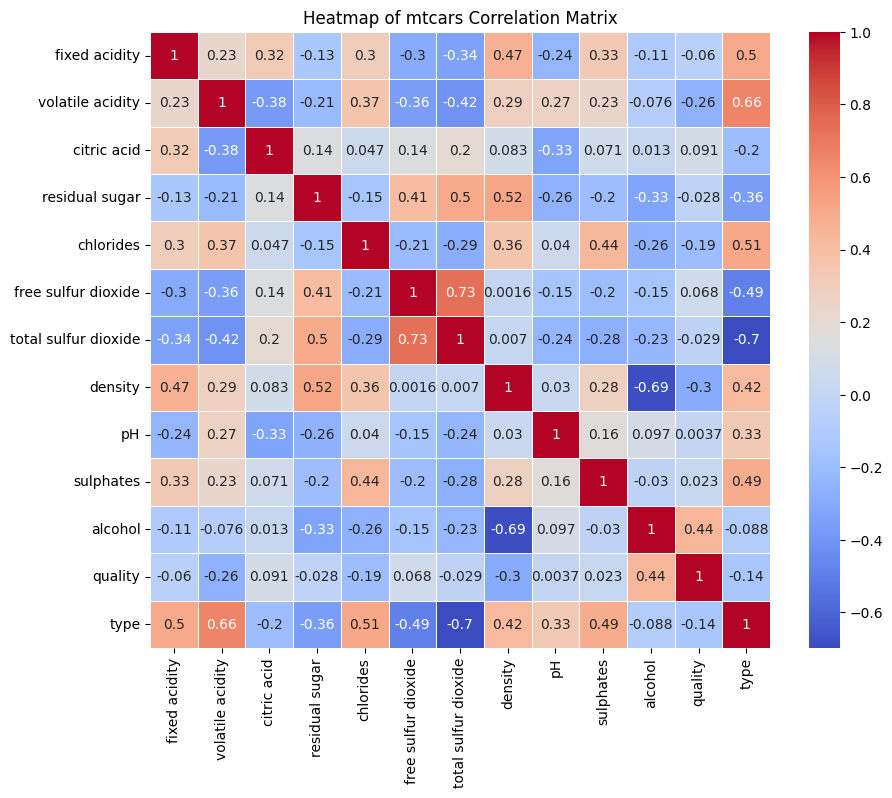

In [8]:
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of mtcars Correlation Matrix')
plt.show()

In [9]:
data = data.drop(['sulphates', 'pH', 'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide'], axis=1)
data

,volatile acidity,citric acid,chlorides,density,alcohol,quality,type
0,0.30,0.36,0.04,0.99,11.40,6,1
1,0.50,0.26,0.06,1.00,9.60,5,2
2,0.50,0.35,0.08,1.00,9.20,5,2
3,0.40,0.33,0.04,0.99,10.90,6,1
4,0.20,0.25,0.08,1.00,9.10,5,1
...,...,...,...,...,...,...,...
6709,0.20,0.19,0.04,1.00,9.50,5,1
6710,0.30,0.34,0.04,0.99,12.40,8,1
6711,0.30,0.24,0.03,0.99,12.30,7,1
6712,0.20,0.31,0.05,0.99,10.90,5,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  6714 non-null   float64
 1   citric acid       6714 non-null   float64
 2   chlorides         6714 non-null   float64
 3   density           6714 non-null   float64
 4   alcohol           6714 non-null   float64
 5   quality           6714 non-null   int64  
 6   type              6714 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 367.3 KB


In [14]:
target = 'quality'
x = data.drop(target, axis=1)
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Lazypredict to test many model

In [15]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

 93%|█████████▎| 27/29 [00:11<00:00,  3.11it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 446
[LightGBM] [Info] Number of data points in the train set: 5371, number of used features: 6
[LightGBM] [Info] Start training from score -5.644330
[LightGBM] [Info] Start training from score -3.363023
[LightGBM] [Info] Start training from score -1.038634
[LightGBM] [Info] Start training from score -0.880359
[LightGBM] [Info] Start training from score -1.843533
[LightGBM] [Info] Start training from score -3.401384
[LightGBM] [Info] Start training from score -6.391545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:11<00:00,  2.51it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [16]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.68,0.38,None,0.67,0.67
ExtraTreesClassifier,0.67,0.38,None,0.66,0.58
DecisionTreeClassifier,0.62,0.37,None,0.62,0.04
ExtraTreeClassifier,0.60,0.35,None,0.60,0.02
BaggingClassifier,0.63,0.35,None,0.63,0.17
LabelSpreading,0.61,0.33,None,0.61,1.04
LabelPropagation,0.61,0.33,None,0.61,0.87
LGBMClassifier,0.60,0.32,None,0.59,0.36
NearestCentroid,0.27,0.28,None,0.31,0.01
